In [69]:
import tushare as ts
import pandas as pd 
from pandas import Series,DataFrame

In [70]:
#使用tushare获取贵州茅台的历史行情数据
df = ts.get_k_data('600519', start='1988-01-01')
#将数据写入到本地进行永久性储存
df.to_csv('./maotai.csv')

In [71]:
df = pd.read_csv('./maotai.csv')
df.head(5)

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
1,1,2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2,2,2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
3,3,2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
4,4,2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519


In [72]:
#将Unnamed：0为无用的列删除
df.drop(labels='Unnamed: 0', axis=1, inplace=True)
df.head(5)

,date,open,close,high,low,volume,code
0,2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
1,2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2,2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
3,2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
4,2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519


In [73]:
df.dtypes

date       object
open      float64
close     float64
high      float64
low       float64
volume    float64
code        int64
dtype: object

In [74]:
#将data列转为时间序列类型
df['date'] = pd.to_datetime(df['date'])

In [75]:
#将data列作为原数据的行索引
df.set_index(df['date'], inplace=True)

In [76]:
df.drop(labels='date', axis=1, inplace=True)
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519


In [77]:
#输出该股票所有收盘比开盘上涨3%以上的日期
(df['close'] - df['open']) / df['open'] > 0.03

date
2001-08-27     True
2001-08-28     True
2001-08-29    False
2001-08-30    False
2001-08-31    False
2001-09-03    False
2001-09-04    False
2001-09-05    False
2001-09-06    False
2001-09-07    False
2001-09-10     True
2001-09-11    False
2001-09-12    False
2001-09-13    False
2001-09-14    False
2001-09-17    False
2001-09-18    False
2001-09-19    False
2001-09-20    False
2001-09-21    False
2001-09-24    False
2001-09-25    False
2001-09-26    False
2001-09-27    False
2001-09-28    False
2001-10-08    False
2001-10-09    False
2001-10-10    False
2001-10-11    False
2001-10-12    False
              ...  
2020-01-21    False
2020-01-22    False
2020-01-23    False
2020-02-03    False
2020-02-04    False
2020-02-05    False
2020-02-06    False
2020-02-07    False
2020-02-10    False
2020-02-11     True
2020-02-12    False
2020-02-13    False
2020-02-14    False
2020-02-17    False
2020-02-18    False
2020-02-19    False
2020-02-20    False
2020-02-21    False
2020-02-24    F

In [78]:
#布尔值可以作为df的行索引
df.loc[(df['close'] - df['open']) / df['open'] > 0.03].index

DatetimeIndex(['2001-08-27', '2001-08-28', '2001-09-10', '2001-12-21',
               '2002-01-18', '2002-01-31', '2003-01-14', '2003-10-29',
               '2004-01-05', '2004-01-14',
               ...
               '2019-05-10', '2019-05-15', '2019-06-11', '2019-06-20',
               '2019-09-12', '2019-09-18', '2020-02-11', '2020-03-02',
               '2020-03-05', '2020-03-10'],
              dtype='datetime64[ns]', name='date', length=307, freq=None)

In [79]:
#输出该股票所有开盘比前日收盘跌幅超过2%的日期
#shift(1)表示让一个Series中的数据整体下移一位
(df['open']-df['close'].shift(1))/df['close'].shift(1) < -0.02
df.loc[(df['open']-df['close'].shift(1))/df['close'].shift(1) < -0.02].index

DatetimeIndex(['2001-09-12', '2002-06-26', '2002-12-13', '2004-07-01',
               '2004-10-29', '2006-08-21', '2006-08-23', '2007-01-25',
               '2007-02-01', '2007-02-06', '2007-03-19', '2007-05-21',
               '2007-05-30', '2007-06-05', '2007-07-27', '2007-09-05',
               '2007-09-10', '2008-03-13', '2008-03-17', '2008-03-25',
               '2008-03-27', '2008-04-22', '2008-04-23', '2008-04-29',
               '2008-05-13', '2008-06-10', '2008-06-13', '2008-06-24',
               '2008-06-27', '2008-08-11', '2008-08-19', '2008-09-23',
               '2008-10-10', '2008-10-15', '2008-10-16', '2008-10-20',
               '2008-10-23', '2008-10-27', '2008-11-06', '2008-11-12',
               '2008-11-20', '2008-11-21', '2008-12-02', '2009-02-27',
               '2009-03-25', '2009-08-13', '2010-04-26', '2010-04-30',
               '2011-08-05', '2012-03-27', '2012-08-10', '2012-11-22',
               '2012-12-04', '2012-12-24', '2013-01-16', '2013-01-25',
      

- 假如某人从2010.01.01开始，每月第一个交易日买入一手股票，每年最后一个交易日 卖出所有股票，到今天，他的收益如何？
- 分析：
     - 买入：
         - 一个完整的年需要买12次股票，一次买一手（100股），总共买入1200股
     - 卖出：
         - 一个完整的年卖一次，一次卖出1200股


In [80]:
#将2010.01.01到今天对应的交易数据去除
data = df['2010':'2020']

In [81]:
#数据的重新取样
data_monthly = data.resample('M').first()
cost_money = (data_monthly['open']*100).sum()

In [82]:
#卖出股票得到的钱
data_yearsly = data.resample('A').last()[:-1]
recv_money = (data_yearsly['open']*1200).sum()
recv_money

4368184.8

In [83]:
#2020年手里剩余的股票价值计算在收益内
last_money = 300*data['close'][-1]

In [84]:
last_money + recv_money - cost_money

599767.7000000002

# 双均线策略模型

In [136]:
df = ts.get_k_data('601318', start='1988-01-01')
df.head(10)

,date,open,close,high,low,volume,code
0,2007-03-01,21.254,19.890,21.666,19.469,1977633.51,601318
1,2007-03-02,19.979,19.728,20.166,19.503,425048.32,601318
2,2007-03-05,19.545,18.865,19.626,18.504,419196.74,601318
3,2007-03-06,18.704,19.235,19.554,18.597,297727.88,601318
4,2007-03-07,19.252,19.758,19.936,19.090,287463.78,601318
5,2007-03-08,19.596,19.520,19.694,19.418,130983.83,601318
6,2007-03-09,19.511,19.354,19.596,19.001,160887.79,601318
7,2007-03-12,19.256,19.005,19.256,18.916,145353.06,601318
8,2007-03-13,19.048,19.082,19.239,18.967,102319.68,601318
9,2007-03-14,18.831,19.103,19.171,18.614,173306.56,601318


In [137]:
df['ma5'] = df['close'].rolling(5).mean()
df['ma30'] = df['close'].rolling(30).mean()
df.tail(10)

,date,open,close,high,low,volume,code,ma5,ma30
3093,2020-02-26,79.45,79.83,80.76,79.11,844166.0,601318,81.280,82.827000
3094,2020-02-27,79.60,79.79,80.40,79.30,666793.0,601318,80.582,82.653333
3095,2020-02-28,78.60,77.72,79.29,77.71,983923.0,601318,79.650,82.409333
3096,2020-03-02,78.32,79.58,80.20,78.32,712323.0,601318,79.422,82.236000
3097,2020-03-03,80.48,79.49,80.57,79.26,678238.0,601318,79.282,82.004000
3098,2020-03-04,79.90,80.58,80.75,79.90,677574.0,601318,79.432,81.795667
3099,2020-03-05,81.01,82.45,82.76,80.62,960642.0,601318,79.964,81.683667
3100,2020-03-06,81.57,80.91,81.92,80.80,584186.0,601318,80.602,81.529000
3101,2020-03-09,78.91,78.14,79.00,78.02,1055082.0,601318,80.314,81.258667
3102,2020-03-10,78.14,79.18,79.78,77.83,717006.0,601318,80.252,80.978000


In [138]:
#数据预处理
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'],inplace=True)
df.drop(labels='date',axis=1,inplace=True)
df.head()

,open,close,high,low,volume,code,ma5,ma30
date,,,,,,,,
2007-03-01,21.254,19.890,21.666,19.469,1977633.51,601318,NaN,NaN
2007-03-02,19.979,19.728,20.166,19.503,425048.32,601318,NaN,NaN
2007-03-05,19.545,18.865,19.626,18.504,419196.74,601318,NaN,NaN
2007-03-06,18.704,19.235,19.554,18.597,297727.88,601318,NaN,NaN
2007-03-07,19.252,19.758,19.936,19.090,287463.78,601318,19.4952,NaN


In [139]:
df['ma5'] = df['close'].rolling(5).mean()
df['ma30'] = df['close'].rolling(30).mean()

In [140]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

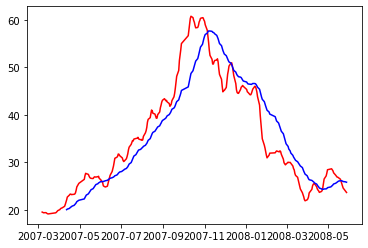

In [141]:
import matplotlib.pyplot as plt
df_p = df[:300]
plt.plot(df_p.index,df_p['ma5'],c='red')
plt.plot(df_p.index,df_p['ma30'],c='blue')

- True:短期均线低于长期均线
- False：短期均线高于长期均线

In [142]:
#True-->False的过渡为金叉，False-->True的过渡为死叉
sr1 = df['ma5'] < df['ma30']



In [143]:
sr2 = df['ma5'] >= df['ma30']

In [144]:
#获取死叉日期
death_date = df.loc[sr1 & sr2.shift(1)].index

In [145]:
#获取金叉日期 
golden_date = df.loc[~(sr1 | sr2.shift(1))].index
golden_date

DatetimeIndex(['2007-03-01', '2007-03-02', '2007-03-05', '2007-03-06',
               '2007-03-07', '2007-03-08', '2007-03-09', '2007-03-12',
               '2007-03-13', '2007-03-14',
               ...
               '2018-10-22', '2018-11-06', '2018-11-19', '2019-01-21',
               '2019-06-13', '2019-08-21', '2019-10-14', '2019-11-05',
               '2019-12-19', '2020-01-02'],
              dtype='datetime64[ns]', name='date', length=102, freq=None)

- 如果某人初始资金100000元，从一开始，金叉尽量买入，死叉全部卖出，则到今天为止，他的收益如何？

In [146]:
first_money = 100000 #成本不变
money = first_money 
hold = 0 #持有股数
s1 = Series(1,index=golden_date) #存储的是金叉日期，用1表示
s2 = Series(0,index=death_date) #存储的是死叉日期，用0表示
s = s1.append(s2)
s = s.sort_index()

#使用开盘价进行股票买卖
for i in range(0,len(s)):
    #买入和卖出的单价
    p = df['open'][s.index[i]]
    if s[i] == 1: #金叉日期
        buy = money // p * 100
        hold = buy * 100
        money -= buy*100*p
        
    else: #卖出
        money += hold*p
        hold = 0
        
money += hold * df['open'][-1]
result = money - first_money
print(result)

nan


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
